In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/onurserce/Desktop/server_home/Control_9_Day_2_croppedDLC_resnet50_dlc_realApr6shuffle1_50000.csv", header=[1,2])
df.drop(('bodyparts', 'coords'), axis = 1, inplace = True)
df.drop('likelihood', axis=1, level=1, inplace=True)
df.columns = ['_'.join(col).strip() for col in df.columns.values]
subset = df.sample(n=250)
subset.head()

,left_ear_x,left_ear_y,right_ear_x,right_ear_y,snout_x,snout_y,center_x,center_y,left_side_x,left_side_y,...,tail_tip_x,tail_tip_y,paw_f_right_x,paw_f_right_y,paw_f_left_x,paw_f_left_y,paw_h_right_x,paw_h_right_y,paw_h_left_x,paw_h_left_y
89166,415.503632,88.288223,416.009949,71.613541,5.678296,0.081043,434.980743,75.890968,433.878510,97.672760,...,512.222900,64.731651,510.972839,60.521019,510.881042,56.561371,432.459229,62.066074,436.319214,100.519295
66954,564.423096,269.915283,569.951721,274.334045,554.301941,262.636627,568.315674,272.545380,568.426575,275.170074,...,618.039551,220.734024,560.575134,288.371887,554.949585,266.984375,545.198059,263.443481,585.199402,261.557709
33850,136.932877,79.131157,123.805702,92.751984,151.602798,100.177940,121.565475,70.738182,111.847641,78.602104,...,56.016201,46.998772,122.241264,97.503250,140.609207,74.080154,146.474792,74.884583,146.872971,70.047882
41819,126.277641,64.568100,127.682404,81.476303,153.222855,69.967545,103.572510,72.414200,106.943832,52.293404,...,55.832588,40.245747,61.301399,50.220238,121.849167,53.194733,89.152702,83.794670,108.091179,53.355274
53041,72.705025,587.512939,85.908951,594.399170,87.580017,574.071777,76.076683,602.788757,58.404446,588.440186,...,54.122837,578.962463,93.823891,580.408630,78.007187,570.320862,75.844055,579.725403,63.926544,591.889465


In [3]:
from sklearn.manifold import TSNE

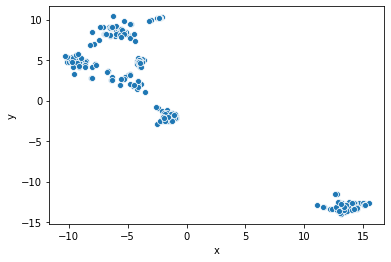

In [4]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=20000, n_iter_without_progress=500, init='random')
transformed = tsne.fit_transform(subset)
transformed = pd.DataFrame(transformed, columns=['x','y'])
sns.scatterplot(data=transformed, x='x', y='y')

transformed.index = subset.index

In [5]:
index = transformed[transformed['x'] > 10].index

to_plot = df.iloc[index, :]
to_plot

,left_ear_x,left_ear_y,right_ear_x,right_ear_y,snout_x,snout_y,center_x,center_y,left_side_x,left_side_y,...,tail_tip_x,tail_tip_y,paw_f_right_x,paw_f_right_y,paw_f_left_x,paw_f_left_y,paw_h_right_x,paw_h_right_y,paw_h_left_x,paw_h_left_y
53041,72.705025,587.512939,85.908951,594.399170,87.580017,574.071777,76.076683,602.788757,58.404446,588.440186,...,54.122837,578.962463,93.823891,580.408630,78.007187,570.320862,75.844055,579.725403,63.926544,591.889465
95,65.582359,603.893494,70.011337,587.729126,53.480694,587.114746,95.531281,603.372803,92.761223,614.391602,...,81.121101,516.519958,71.892578,578.790344,56.312828,594.073059,128.406204,605.494995,92.512108,615.602478
92287,186.762741,601.969849,175.413193,609.888733,198.195923,612.670715,141.885132,601.410034,142.307480,588.290771,...,70.024246,566.617310,180.642014,621.007202,172.249481,587.644348,179.251434,616.599365,164.916641,592.138245
47454,143.400330,596.944153,152.611450,607.376038,161.187012,580.943359,131.289383,607.305298,128.123428,586.175171,...,83.779213,553.549316,160.533264,584.175903,149.748749,576.625854,139.899734,621.027710,125.392250,589.836609
59982,208.599304,599.427612,208.677551,615.713074,226.521255,597.164185,184.868256,605.235413,193.922943,592.709595,...,119.347610,579.532837,203.268265,630.935059,207.190079,591.462585,160.862823,610.073853,188.694687,588.393921
32268,103.012939,602.414978,95.318817,612.379028,107.239502,612.023010,76.588486,600.459351,85.537476,587.922668,...,58.913677,530.177856,89.664406,621.839294,93.789055,585.463501,65.830658,614.017151,89.373505,589.131409
15399,98.386841,599.524353,105.583336,608.678589,112.764847,590.073486,92.663651,596.496826,94.968697,587.318176,...,54.451912,623.291870,101.866486,611.267700,104.141350,580.612427,93.460663,605.795654,92.944405,579.647705
60787,113.486557,603.337952,111.543846,613.748169,126.220909,603.819214,87.769371,596.746399,97.446472,588.039551,...,46.585007,609.557312,56.033993,602.300659,115.178894,588.209290,61.795498,604.202209,73.606636,586.317871
48649,115.612442,595.535034,123.155701,603.620239,135.064514,582.744751,96.437904,602.011658,93.553848,582.076477,...,46.375397,607.627502,94.784004,574.570129,107.931641,574.254944,70.309532,611.234985,89.996246,583.441223
47184,83.010750,612.786621,83.343422,598.412048,64.959869,604.654541,107.456711,602.499451,109.620338,614.101379,...,52.662483,607.241272,88.244499,584.613403,98.558655,567.414185,103.857170,582.459961,71.547272,600.638733


In [6]:
def plotter(indexes, to_plot):
    plt.figure(figsize=(12,12))
    counter=1
    for i in indexes:
        plt.subplot(4,4,counter)
        plt.scatter(x=to_plot.loc[i, 'left_ear_x'], y=to_plot.loc[i, 'left_ear_y'])
        plt.scatter(x=to_plot.loc[i, 'right_ear_x'], y=to_plot.loc[i, 'right_ear_y'])
        plt.scatter(x=to_plot.loc[i, 'snout_x'], y=to_plot.loc[i, 'snout_y'])
        plt.scatter(x=to_plot.loc[i, 'center_x'], y=to_plot.loc[i, 'center_y'])
        plt.scatter(x=to_plot.loc[i, 'left_side_x'], y=to_plot.loc[i, 'left_side_y'])
        plt.scatter(x=to_plot.loc[i, 'right_side_x'], y=to_plot.loc[i, 'right_side_y'])
        plt.scatter(x=to_plot.loc[i, 'tail_base_x'], y=to_plot.loc[i, 'tail_base_y'])
        plt.scatter(x=to_plot.loc[i, 'tail_tip_x'], y=to_plot.loc[i, 'tail_tip_y'])
        plt.scatter(x=to_plot.loc[i, 'paw_f_right_x'], y=to_plot.loc[i, 'paw_f_right_y'], marker='+')
        plt.scatter(x=to_plot.loc[i, 'paw_f_left_x'], y=to_plot.loc[i, 'paw_f_left_y'], marker='+')
        plt.scatter(x=to_plot.loc[i, 'paw_h_left_x'], y=to_plot.loc[i, 'paw_h_left_y'], marker='+')
        plt.scatter(x=to_plot.loc[i, 'paw_h_right_x'], y=to_plot.loc[i, 'paw_h_right_y'], marker='+')
        
        plt.plot([to_plot.loc[i, 'left_ear_x'], to_plot.loc[i, 'right_ear_x']],
             [to_plot.loc[i, 'left_ear_y'], to_plot.loc[i, 'right_ear_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'left_ear_x'], to_plot.loc[i, 'snout_x']],
                 [to_plot.loc[i, 'left_ear_y'], to_plot.loc[i, 'snout_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'right_ear_x'], to_plot.loc[i, 'snout_x']],
                 [to_plot.loc[i, 'right_ear_y'], to_plot.loc[i, 'snout_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'left_ear_x'], to_plot.loc[i, 'left_side_x']],
                 [to_plot.loc[i, 'left_ear_y'], to_plot.loc[i, 'left_side_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'right_ear_x'], to_plot.loc[i, 'right_side_x']],
                 [to_plot.loc[i, 'right_ear_y'], to_plot.loc[i, 'right_side_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'left_side_x'], to_plot.loc[i, 'tail_base_x']],
                 [to_plot.loc[i, 'left_side_y'], to_plot.loc[i, 'tail_base_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'right_side_x'], to_plot.loc[i, 'tail_base_x']],
                 [to_plot.loc[i, 'right_side_y'], to_plot.loc[i, 'tail_base_y']], color='k', linestyle='-', linewidth=1)
        plt.plot([to_plot.loc[i, 'tail_base_x'], to_plot.loc[i, 'tail_tip_x']],
                 [to_plot.loc[i, 'tail_base_y'], to_plot.loc[i, 'tail_tip_y']], color='k', linestyle='-', linewidth=1)
        counter +=1
        #plt.xlim(0, 700)
        #plt.ylim(0, 700)

    plt.show()

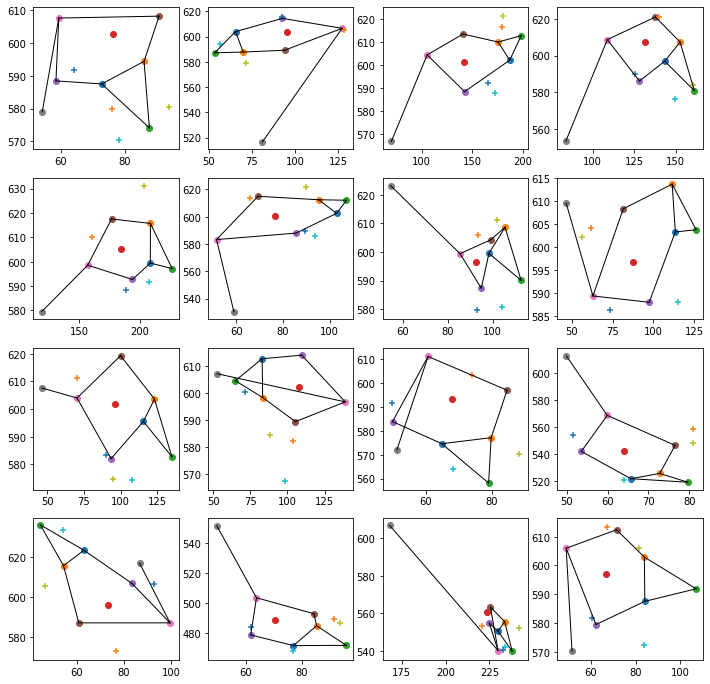

In [7]:
plotter(to_plot.index[:16], subset)

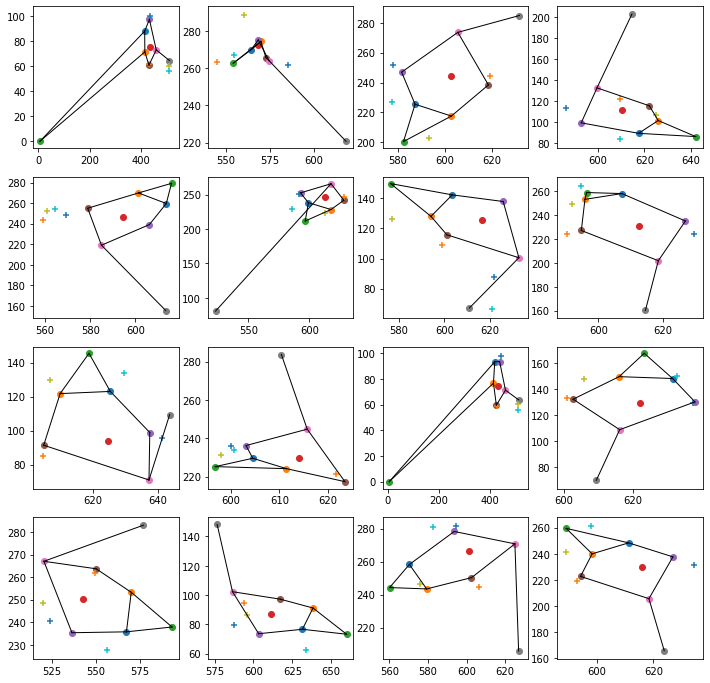

In [8]:
index2 = transformed[transformed['x'] < -5].index
to_plot2 = df.iloc[index2, :]
plotter(to_plot2.index[:16], df)

In [9]:
from sklearn.manifold import Isomap

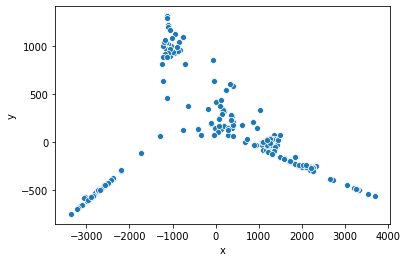

In [10]:
isomap = Isomap(eigen_solver='dense')
transformed_iso = isomap.fit_transform(subset)
transformed_iso = pd.DataFrame(transformed_iso, columns=['x','y'])
sns.scatterplot(data=transformed_iso, x='x', y='y')

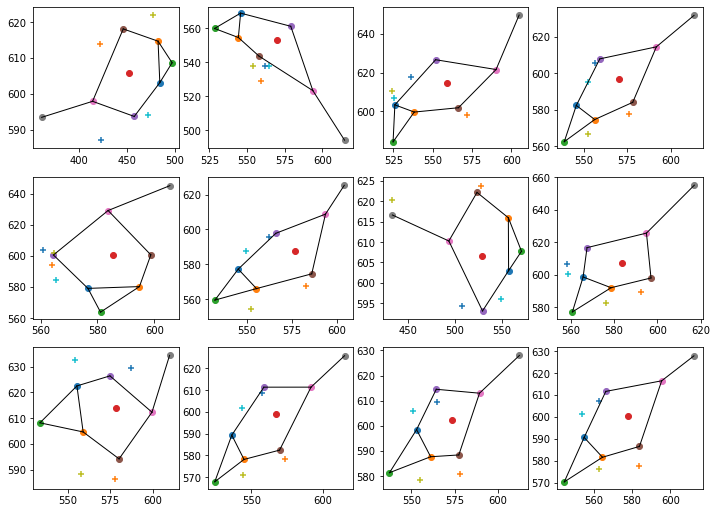

In [13]:
transformed_iso.index = subset.index
index = transformed_iso[transformed_iso['x'] > 3000].index
to_plot = df.iloc[index, :]
plotter(to_plot.index[:16], subset)

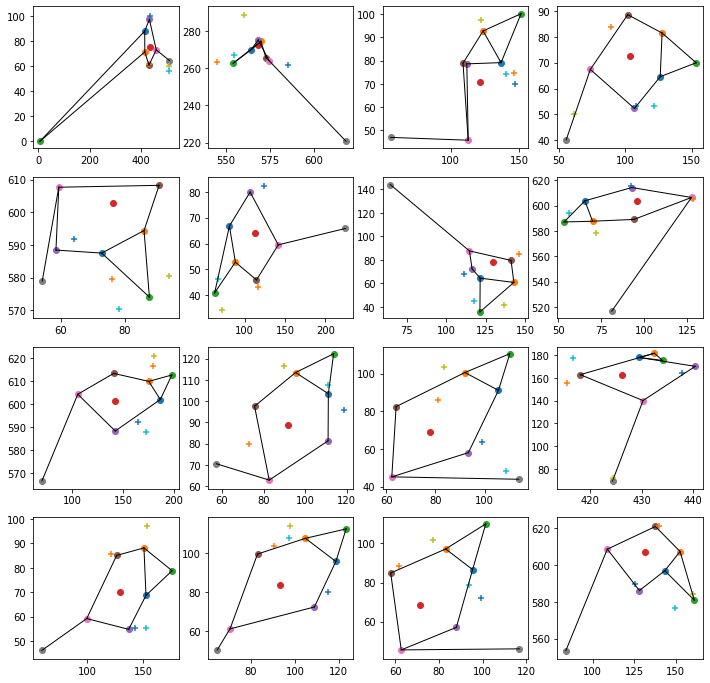

In [12]:
index2 = transformed_iso[transformed_iso['x'] < 2000].index
to_plot2 = df.iloc[index2, :]
plotter(to_plot2.index[:16], df)